<a href="https://colab.research.google.com/github/Bharathraj5002/people-count/blob/main/people_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CLONE YOLOV5 REPOSITORY***

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 16383, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 16383 (delta 138), reused 153 (delta 71), pack-reused 16106
Receiving objects: 100% (16383/16383), 15.09 MiB | 24.88 MiB/s, done.
Resolving deltas: 100% (11176/11176), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


# **INSTALL ALL THE DEPENDENCIES**

In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
Setup complete. Using torch 2.1.0+cu121 CPU


In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
#rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:

from roboflow import Roboflow
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image



#**IMPORT THE MODEL**

In [ ]:
rf = Roboflow(api_key="YOUR_API")
project = rf.workspace().project("YOUR_MODEL_ID")
model = project.version(VERSION_ID).model

loading Roboflow workspace...
loading Roboflow project...


# **GET THE IMAGES FROM THE FIREBASE bold text**

In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
from io import BytesIO
from PIL import Image
import os

# Path to your service account key JSON file
json_file_path = 'YOUR_FIREBASE_JSON_FILE'

# Check if the app is already initialized
if not firebase_admin._apps:
    # Firebase Admin SDK credentials
    cred = credentials.Certificate(json_file_path)
    firebase_admin.initialize_app(cred, {'storageBucket': 'YOUR_FIREBASE_BUCKET'})

# Reference to your Firebase Storage bucket
bucket = storage.bucket()

# Specify the path in the bucket where your images are stored
blob_prefix = 'images/'

# Local path to upload images in Colab
colab_upload_path = 'PATH_TO_COLAB'

# Create the local directory if it doesn't exist
os.makedirs(colab_upload_path, exist_ok=True)

# Download images and upload to Colab
for blob in bucket.list_blobs(prefix=blob_prefix):
    # Download the image to a local directory
    local_path = os.path.join(colab_upload_path, blob.name.split('/')[-1])
    blob.download_to_filename(local_path)

# Now you have downloaded and uploaded all images to the specified path in Colab


# **MODEL TO DETECT THE NUMBER OF PEOPLE PRESENT IN AN IMAGE**

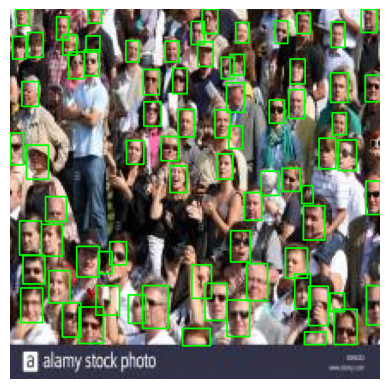

Number of people detected in img_12_jpg.rf.2195dacf7cd0f85a6a845846f0b545bd.jpg: 76


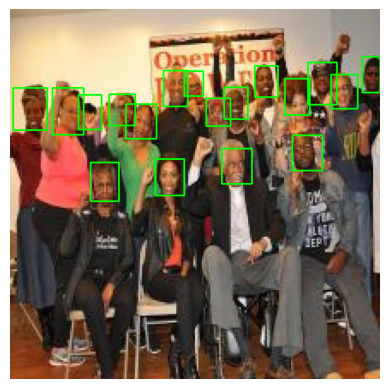

Number of people detected in img_75_JPG_jpg.rf.f4b4e7a16d92cbebd0dc44d9e4159dc3.jpg: 18


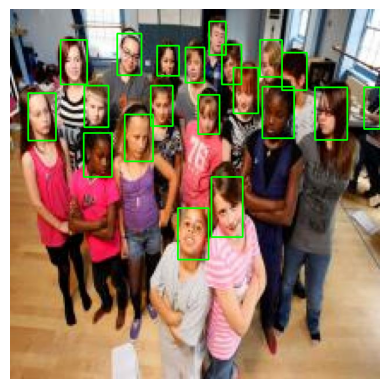

Number of people detected in img_19_jpg.rf.a8c829b8a3a2f8f2d9ff034fc2502466.jpg: 20


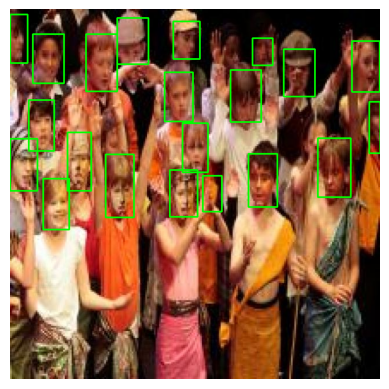

Number of people detected in img_17_jpg.rf.73d835f4ecf6fdcb5bf80e4d6dc6ceb7.jpg: 21


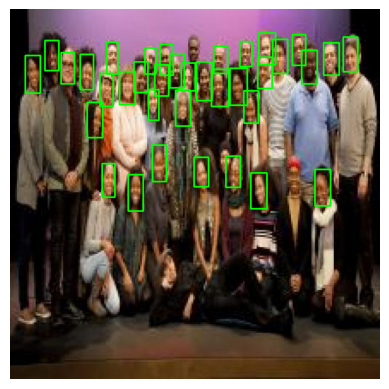

Number of people detected in img_45_jpg.rf.c71e29e6008355be8d9260246b84536d.jpg: 36


In [24]:
import os
from PIL import Image
import cv2
import numpy as np

# Path to the folder containing images
images_folder = "IMAGE_FOLDER"

# Iterate through each image in the folder
for image_file in os.listdir(images_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.webp')):
        # Full path to the image
        image_path = os.path.join(images_folder, image_file)

        # Perform prediction
        prediction = model.predict(image_path, confidence=0.5, overlap=0.3).json()

        # Open the image using OpenCV for drawing bounding boxes
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        # Draw bounding boxes on the image
        for bounding_box in prediction["predictions"]:
            x, y, w, h = bounding_box['x'], bounding_box['y'], bounding_box['width'], bounding_box['height']

            # Calculate coordinates
            x0, y0, x1, y1 = int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)

            # Draw bounding box
            cv2.rectangle(img, (x0, y0), (x1, y1), color=(0, 255, 0), thickness=2)

        # Convert back to PIL image for displaying with Matplotlib
        img_pil = Image.fromarray(img)

        # Display the image with bounding boxes
        plt.imshow(img_pil)
        plt.axis('off')
        plt.show()

        # Print the number of people detected
        num_people = len(prediction['predictions'])
        print(f'Number of people detected in {image_file}: {num_people}')


# **DELETE ALL THE IMAGES PRESENT IN COLAB DIRECTORY**

In [ ]:
import os

# Specify the local path where your images are stored in Colab
colab_upload_path = 'IMAGE_FOLDER_PATH'

# List all files in the specified directory (excluding directories)
files_to_delete = [file_name for file_name in os.listdir(colab_upload_path)
                   if os.path.isfile(os.path.join(colab_upload_path, file_name))]

# Delete each file in the directory
for file_name in files_to_delete:
    file_path = os.path.join(colab_upload_path, file_name)
    os.remove(file_path)
    print(f"Deleted file: {file_path}")

print("All images in the specified Colab path have been deleted.")


Deleted file: /content/drive/MyDrive/honey well/img store/image_2024-01-24_12-26-53.jpg
Deleted file: /content/drive/MyDrive/honey well/img store/image_2024-01-24_12-26-55.jpg
Deleted file: /content/drive/MyDrive/honey well/img store/image_2024-01-24_12-26-56.jpg
Deleted file: /content/drive/MyDrive/honey well/img store/image_2024-01-24_12-26-57.jpg
Deleted file: /content/drive/MyDrive/honey well/img store/image_2024-01-24_12-26-58.jpg
All images in the specified Colab path have been deleted.


# **DELETE ALL THE IMAGES IN FIREBASE**

In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import os

# Path to your service account key JSON file
json_file_path = 'YOUR_FIREBASE_JSON_FILE'

# Check if the app is already initialized
if not firebase_admin._apps:
    # Firebase Admin SDK credentials
    cred = credentials.Certificate(json_file_path)
    firebase_admin.initialize_app(cred, {'storageBucket': 'YOUR_FIREBASE_BUCKET'})

# Reference to your Firebase Storage bucket
bucket = storage.bucket()

# Specify the path in the bucket where your images are stored
blob_prefix = 'images/'

# Delete all images in the specified path
blobs = bucket.list_blobs(prefix=blob_prefix)
for blob in blobs:
    blob.delete()
    print(f"Deleted image: {blob.name}")

print("All images in the specified path have been deleted.")


Deleted image: images/image_2024-01-24_12-43-32.jpg
Deleted image: images/image_2024-01-24_12-43-34.jpg
Deleted image: images/image_2024-01-24_12-43-35.jpg
Deleted image: images/image_2024-01-24_12-43-36.jpg
Deleted image: images/image_2024-01-24_12-43-38.jpg
All images in the specified path have been deleted.
